In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


In [2]:
# expensive hours: 8:00-16:00
source_1_price = np.ones(24)
source_1_price[8:16] = 2
source_1_price = np.tile(source_1_price,7)

# Multiply by 1.5 to get source 2 prices
source_2_price = 1.5 * source_1_price

In [3]:
# Hourly water demand
hourly_demand = np.array([
    2, 2, 2, 2, 3, 5, 10, 12, 10, 8, 6, 5, 5, 5, 5, 6, 7, 9, 10, 9, 6, 4, 3, 2
])
# Normalize: Daily demand is 1000
TOTAL_DAILY_DEMAND = 1000
hourly_demand = (hourly_demand / hourly_demand.sum()) * TOTAL_DAILY_DEMAND

# on day 7: less demand
hourly_demand = np.append(np.tile(hourly_demand,6), hourly_demand / 2)

## Your Code

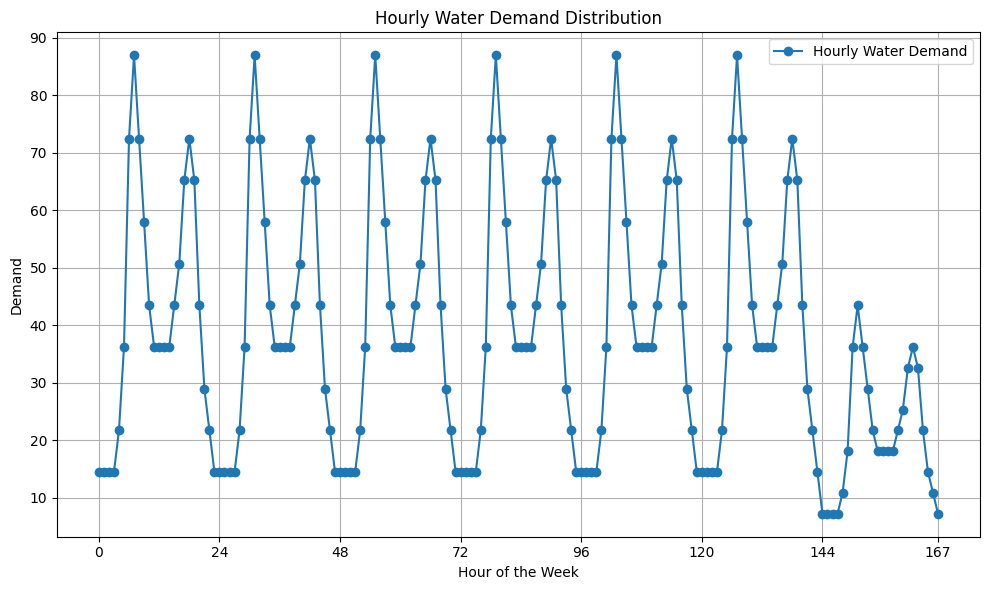

In [4]:
# Plot demand graph
def print_demand(hourly_demand):
    hours = np.arange(0, 168)  
    plt.figure(figsize=(10, 6))
    plt.plot(hours, hourly_demand, marker='o', label='Hourly Water Demand')
    plt.title('Hourly Water Demand Distribution')
    plt.xlabel('Hour of the Week')
    plt.ylabel('Demand')
    plt.xticks(hours)
    plt.xticks([i for i in range(168) if i % 24 == 0 or i == 167])
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

print_demand(hourly_demand)

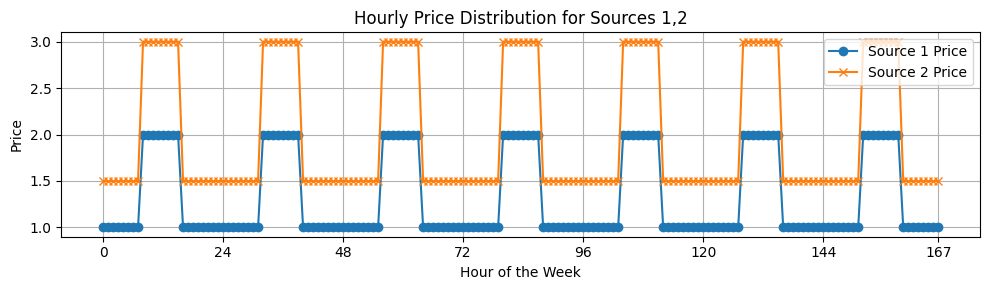

In [5]:
# Plot price {1,2} graph
plt.figure(figsize=(10, 3))
hours = np.arange(0, 168)  
plt.plot(hours, source_1_price, marker='o', label='Source 1 Price')
plt.plot(hours, source_2_price, marker='x', label='Source 2 Price')
plt.title('Hourly Price Distribution for Sources 1,2')
plt.xlabel('Hour of the Week')
plt.ylabel('Price')
plt.xticks([i for i in range(168) if i % 24 == 0 or i == 167])
plt.grid()
plt.legend()
plt.tight_layout()


plt.show()

In [6]:
# Size of the agent's pool
AGENT_WATER_VOLUME_MAX = 300

# Price of missing a 1 water unit of consumer: 
# e.g agent's water volume = 10, consumer demand = 20, price = (20-10) * PENALTY_PER_WATER_UNIT
PENALTY_PER_WATER_UNIT = 1000


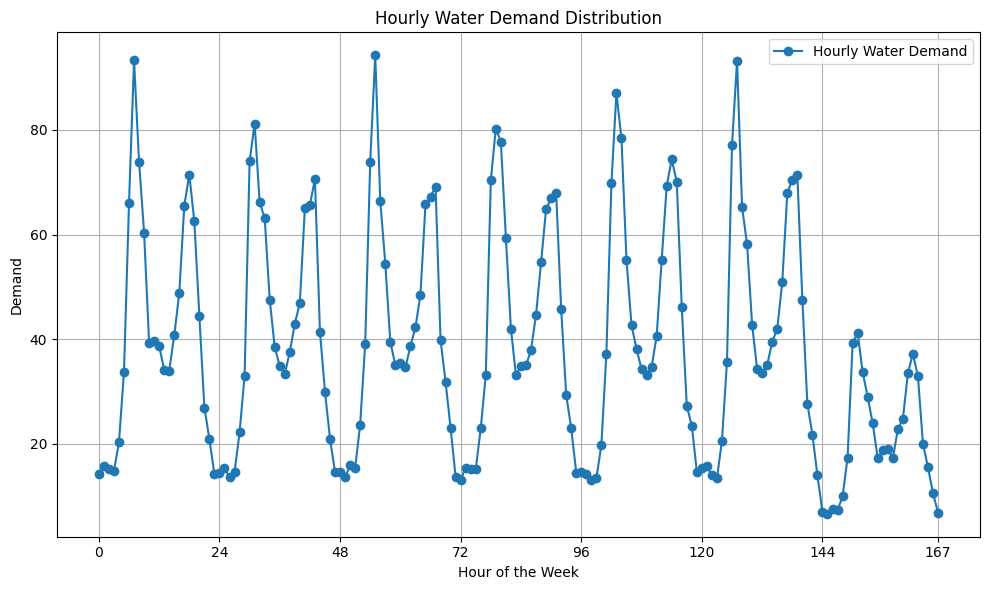

In [7]:
random_noise = np.random.uniform(0.9, 1.1, size=168)
hourly_demand_noised = hourly_demand * random_noise

print_demand(hourly_demand_noised)

In [8]:
def calculate_price(amount_to_buy: float, base_price: float) -> float:
    return amount_to_buy * base_price + 0.05 * base_price * (amount_to_buy -1) ** 2

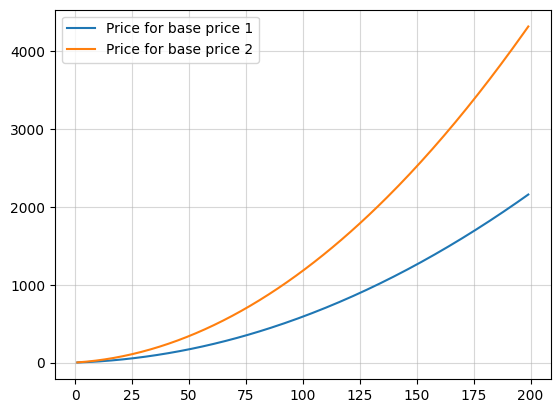

In [9]:
# price for base prices 1, 2
max_range = 200
ys1 = [calculate_price(i, 1) for i in range(1, max_range)]
ys2 = [calculate_price(i, 2) for i in range(1, max_range)]

plt.plot(range(1, max_range), ys1, label='Price for base price 1')
plt.plot(range(1, max_range), ys2, label='Price for base price 2')
plt.legend()
plt.grid(alpha=0.5) 
plt.show()


## Make Demand Great Again

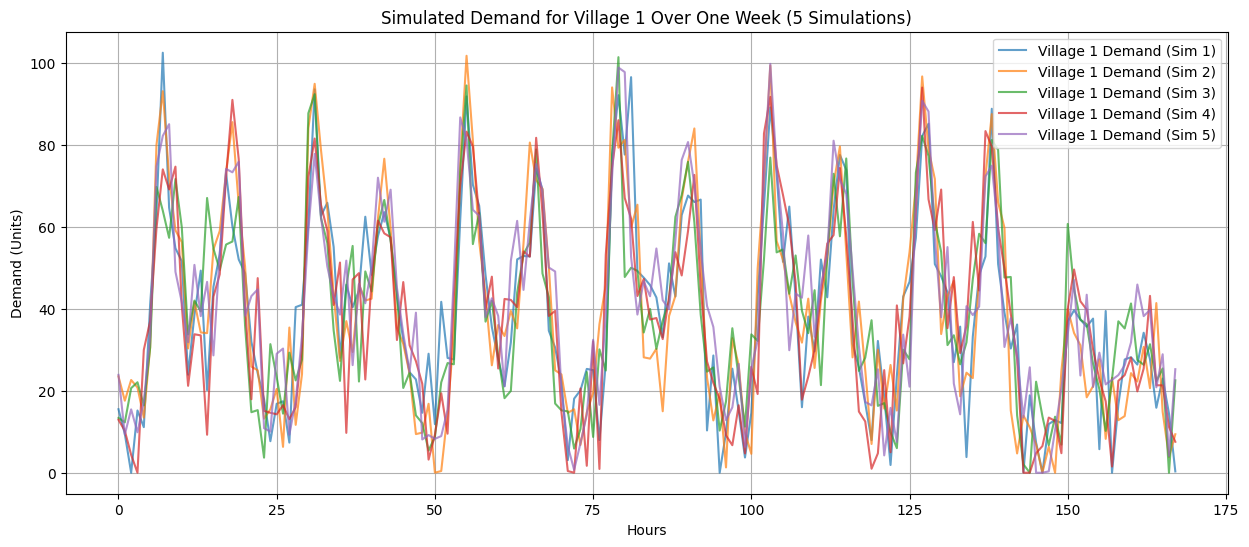

In [10]:
def hourly_demand_means():
    # Hourly water demand according to: 
    hourly_demand = np.array([
        2, 2, 2, 2, 3, 5, 10, 12, 10, 8, 6, 5, 5, 5, 5, 6, 7, 9, 10, 9, 6, 4, 3, 2
    ])
    # Normalize: Daily demand is 1000
    TOTAL_DAILY_DEMAND = 1000
    hourly_demand = (hourly_demand / hourly_demand.sum()) * TOTAL_DAILY_DEMAND

    # on day 7: less demand
    hourly_demand = np.append(np.tile(hourly_demand,6), hourly_demand / 2)
    return hourly_demand



def sample_demand(hour, std=10):
    # Sample from a normal distribution, ensure demand is non-negative
    hourly_demand = hourly_demand_means()
    mean_demand = hourly_demand[hour] # Mean demand follows a daily pattern, higher during the day (6 AM to 6 PM)
    return max(0, np.random.normal(mean_demand, std)) # When std_dev is relatively low we will get lines that are very very close to the original function.

# Function to sample and plot 5 simulations for a single village over one week
def sample_and_plot_5_weeks_demand_single_village(std_dev=10):
    hours = 168  # One week (168 hours)
    all_v1_demand = []

    # Generate demand for 5 different simulations of the same week
    for _ in range(5):
        v1_demand = []
        for hour in range(hours):
            v1_demand.append(sample_demand(hour, std_dev))
        all_v1_demand.append(v1_demand)

    # Plot all 5 simulations on the same graph for Village 1
    plt.figure(figsize=(15, 6))

    for i in range(5):
        plt.plot(all_v1_demand[i], label=f"Village 1 Demand (Sim {i+1})", alpha=0.7)

    plt.title("Simulated Demand for Village 1 Over One Week (5 Simulations)")
    plt.xlabel("Hours")
    plt.ylabel("Demand (Units)")
    plt.legend()
    plt.grid()
    plt.show()

# Call the function to generate and plot
sample_and_plot_5_weeks_demand_single_village()


In [11]:
# # Setting up the gymnasium environment
# !pip install -q swig
# !pip install -q mediapy
# !pip install gymnasium
# !pip install stable-baselines3
# !pip install matplotlib


In [12]:
# expensive hours: 8:00-16:00
source_1_price = np.ones(24)
source_1_price[8:16] = 2
source_1_price = np.tile(source_1_price,7)

# Multiply by 1.5 to get source 2 prices
source_2_price = 1.5 * source_1_price

## Actual Environment

In [13]:
from env import WaterSupplyEnv

def test_water_supply_env():
    # Initialize the environment
    env = WaterSupplyEnv()

    # Reset the environment
    state = env.reset()
    print("Initial State:", state)

    # Number of steps to simulate
    num_steps = 10

    # Simulate a few steps with random actions
    for step in range(num_steps):
        print(f"\n--- Step {step + 1} ---")
        
        # Random action within action space
        action = env.action_space.sample()
        print("Action:", action)
        
        # Take a step
        next_state, reward, done, info = env.step(action)
        
        # Print results
        print("Next State:", next_state)
        print("Reward:", reward)
        print("Done:", done)
        
        # Render environment
        env.render()

        if done:
            break

# Run the test
test_water_supply_env()


Initial State: [3.00000000e+02 1.00000000e+00 1.50000000e+00 1.85002602e-01
 0.00000000e+00]

--- Step 1 ---
Action: [ 17.63162 261.29752 198.99147]
Next State: [300.           1.           1.5         15.77379777   1.        ]
Reward: -3515.10348828339
Done: False
Water Stock: 300, Price A: 1.0, Price B: 1.5, Demand: 15.773797772296298, MONEY: -3515.10348828339

--- Step 2 ---
Action: [ 25.490547 225.50415  255.91733 ]
Next State: [279.30356429   1.           1.5          7.68223705   2.        ]
Reward: -1614.7213547129686
Done: False
Water Stock: 279.3035642882506, Price A: 1.0, Price B: 1.5, Demand: 7.682237048439598, MONEY: -5129.824842996359

--- Step 3 ---
Action: [261.63602      0.81500614 163.896     ]
Next State: [300.           1.           1.5         22.89918911   3.        ]
Reward: -2020.457795677931
Done: False
Water Stock: 300, Price A: 1.0, Price B: 1.5, Demand: 22.899189113075646, MONEY: -7150.28263867429

--- Step 4 ---
Action: [113.289154 181.48169   96.97385 ]
Nex

In [3]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from env import WaterSupplyEnv

# Assuming your WaterSupplyEnv class is already defined

# Initialize the environment
env = WaterSupplyEnv()

# Wrap the environment for vectorized training (optional, useful for PPO)
vec_env = make_vec_env(lambda: env, n_envs=1)

# Define the PPO model
model = PPO("MlpPolicy", vec_env, verbose=1)

# Train the agent
print("Training the PPO model...")
model.learn(total_timesteps=10000)  # Adjust timesteps as needed
print("Training complete!")

# Save the model
model.save("ppo_water_supply")

# Load the model (optional, for later use)
model = PPO.load("ppo_water_supply")

# Test the trained agent
obs, _ = env.reset()
for _ in range(100):  # Run 100 steps in the environment
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
        obs = env.reset()


Using cpu device
Training the PPO model...
-----------------------------
| time/              |      |
|    fps             | 2625 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1831          |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 2.2773747e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.26         |
|    explained_variance   | -3.81e-06     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.9e+11       |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.45e-05     |
|    std                  | 1             |

### Optional Comparisons for part 2

1. **Allow agent to sell water vs. Not allowing agent to sell water.** - Eran
2. **Actor Critic vs. DQN vs. Q-learning with discretization.** - Iftah will start and Eran will join when he is done with our main priority which is #1 that we decided he woud do because we trust him more than anyone on campus.
3. **Normalize reward with baseline vs. not normalizing reward with baseline.** - Eran
4. **Discount factor vs. non discount factor** - Iftah
5. **Monte carlo vs. temporal difference. vs. monte carlo with reward to go**
6. **Batch learning - this is really cool, let's do it.**
7. **finite horizon vs. infinite horizon**


### Optional Novelty for part 3
1. Variance nomalization for actor critic.
2. Make action space discrete by splitting to large batches, learn how to act in each batch indvidually.
3. Learn parameters for Q-learning discretization with machine learning.

In [4]:
# Option 1: Use DummyVecEnv (easier to debug, no parallelism)
from stable_baselines3.common.monitor import Monitor
import gymnasium as gym
from gymnasium.envs.registration import register
EPISODE_LENGTH = 168 * 12 # One week (168 hours) - a season is 12 weeks.


def create_env(filename):
    if 'WaterSupplyEnv-v1' not in gym.envs.registry.keys():
        register(
            id='WaterSupplyEnv-v1',
            entry_point='env:WaterSupplyEnv',
            max_episode_steps=EPISODE_LENGTH,
        )
    return Monitor(gym.make('WaterSupplyEnv-v1'), filename=filename)


def create_discrete_env(filename):
    if 'DiscretizedWaterSupplyEnv-v1' not in gym.envs.registry.keys():
        register(
            id='DiscretizedWaterSupplyEnv-v1',
            entry_point='env:DiscretizedWaterSupplyEnv',
            max_episode_steps=EPISODE_LENGTH,
        )
    return Monitor(gym.make('DiscretizedWaterSupplyEnv-v1'), filename=filename)

In [22]:
# import gymnasium as gym
# from stable_baselines3 import A2C, DQN
# from stable_baselines3.common.evaluation import evaluate_policy
# import matplotlib.pyplot as plt
# import env  # Import your custom environment
# from gymnasium.envs.registration import register

# EPISODE_LENGTH = 168 * 12 # One week (168 hours) - a season is 12 weeks.
# NUM_EPISODES = 100
# if 'WaterSupplyEnv-v1' not in gym.envs.registry.keys():
#     register(
#         id='WaterSupplyEnv-v1',
#         entry_point='env:WaterSupplyEnv',
#         max_episode_steps=EPISODE_LENGTH,
#     )

# if 'DiscretizedWaterSupplyEnv-v1' not in gym.envs.registry.keys():
#     register(
#         id='DiscretizedWaterSupplyEnv-v1',
#         entry_point='env:DiscretizedWaterSupplyEnv',
#         max_episode_steps=EPISODE_LENGTH,
#     )


# # Step 2: Create multiple environments for vectorized training
# n_envs = 4  # Number of parallel environments

# a2c_env = create_env(filename="A2C.csv")
# dqn_env = create_discrete_env(filename='DQN.csv')
# # Step 3: Train the A2C agent
# print("Training A2C Agent...")
# a2c_model = A2C("MlpPolicy", a2c_env, verbose=1)
# a2c_model.learn(total_timesteps=EPISODE_LENGTH * NUM_EPISODES)
# a2c_model.save("a2c_water_supply")

# # Step 4: Train the DQN agent
# print("Training DQN Agent...")
# dqn_model = DQN("MlpPolicy", dqn_env, verbose=1)
# dqn_model.learn(total_timesteps=EPISODE_LENGTH * NUM_EPISODES)
# dqn_model.save("dqn_water_supply")

# # Step 5: Evaluate the agents
# print("Evaluating A2C Agent...")
# a2c_mean_reward, _ = evaluate_policy(a2c_model, a2c_env, n_eval_episodes=10)

# # print("Evaluating DQN Agent...")
# dqn_mean_reward, _ = evaluate_policy(dqn_model, dqn_env, n_eval_episodes=10)

# print(f"A2C Mean Reward: {a2c_mean_reward}")
# print(f"DQN Mean Reward: {dqn_mean_reward}")

# # Step 7: Render the environment with trained agents
# print("Rendering A2C Agent...")
# obs, _ = a2c_env.reset()
# for _ in range(168):  # Simulate one week (168 steps)
#     action, _ = a2c_model.predict(obs)
#     obs, rewards, dones, truncated, info = a2c_env.step(action)
#     a2c_env.render()

# print("Rendering DQN Agent...")
# obs, _ = dqn_env.reset()
# for _ in range(168):  # Simulate one week (168 steps)
#     action, _ = dqn_model.predict(obs)
#     obs, rewards, dones, truncated, info = dqn_env.step(action)
#     dqn_env.render()


Training A2C Agent...
Using cpu device
Wrapping the env in a DummyVecEnv.


c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation 

-------------------------------------
| time/                 |           |
|    fps                | 1016      |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -4.28     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.54e+05 |
|    std                | 1.01      |
|    value_loss         | 4.13e+09  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 993       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -4.3      |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_

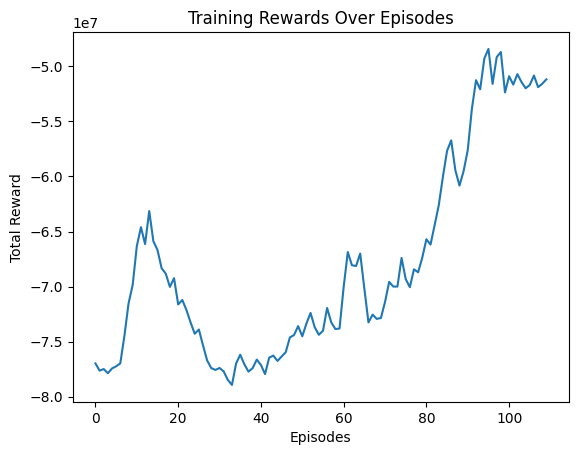

In [23]:
import pandas as pd

# Load the monitor log file
log_data = pd.read_csv("A2C.csv.monitor.csv", skiprows=1)  # Skip the first comment line
episode_rewards = log_data["r"].tolist()

# Plot the rewards
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Training Rewards Over Episodes")
plt.show()

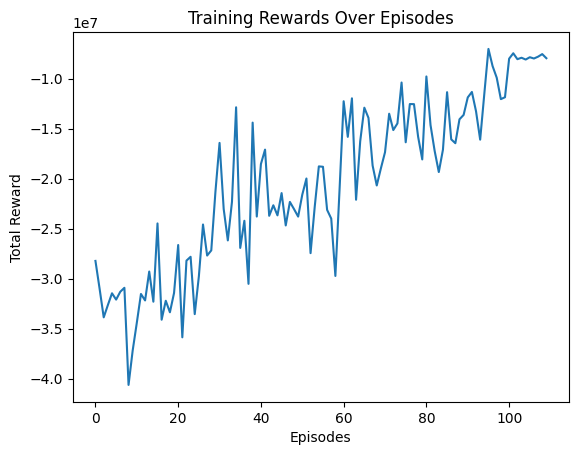

In [24]:
# Load the monitor log file
log_data = pd.read_csv("DQN.csv.monitor.csv", skiprows=1)  # Skip the first comment line
episode_rewards = log_data["r"].tolist()

# Plot the rewards
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Training Rewards Over Episodes")
plt.show()

In [7]:
import numpy as np
import math

def round_down_to_multiple_of_10(number):
    return math.floor(number / 10) * 10

class Discretizer:

    def __init__(self):
        self.water_bins = 30
        self.demand_bins = 30
   
    def discretize_state(self, state):
        # State: [water_level, demand, current_hour]
        water_level, demand, current_hour = state

        # Discretize `water_level` and `demand`, clamping indices to valid ranges
        bin_water_level = round_down_to_multiple_of_10(water_level)
        bin_demand = round_down_to_multiple_of_10(demand)

        # Combine into a tuple
        discrete_state = (bin_water_level, bin_demand, int(current_hour))
        return discrete_state



In [8]:
import gymnasium as gym
from stable_baselines3 import A2C, DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import env  # Import your custom environment
from gymnasium.envs.registration import register

class QLearningAgent:
    def __init__(self, env, discretizer, **kwargs):
        self.env = env
        self.discretizer = discretizer

        # Create a Q-table with dimensions: (water_bins, demand_bins, 24, num_actions)
        self.q_table = np.zeros(
            (30, 30, 168, env.action_space.n)
        )

        # Q-learning parameters
        self.learning_rate = kwargs.get("learning_rate", 0.1)
        self.discount_factor = kwargs.get("discount_factor", 0.99)
        self.exploration_rate = kwargs.get("exploration_rate", 1.0)
        self.exploration_decay = kwargs.get("exploration_decay", 0.995)
        self.min_exploration_rate = kwargs.get("min_exploration_rate", 0.01)

    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.discretizer.discretize_state(state)
            done = False

            while not done:
                # Epsilon-greedy action selection
                if np.random.rand() < self.exploration_rate:
                    action = self.env.action_space.sample()  # Explore
                else:
                    flat_state = self.discretizer.flatten_state(discrete_state)
                    action = np.argmax(self.q_table[flat_state])  # Exploit

                # Take the action
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                next_discrete_state = self.discretizer.discretize_state(next_state)

                # Q-value update
                flat_state = self.discretizer.flatten_state(discrete_state)
                flat_next_state = self.discretizer.flatten_state(next_discrete_state)
                self.q_table[flat_state, action] += self.learning_rate * (
                    reward
                    + self.discount_factor * np.max(self.q_table[flat_next_state])
                    - self.q_table[flat_state, action]
                )

                discrete_state = next_discrete_state
                done = terminated or truncated

            # Decay exploration rate
            self.exploration_rate = max(
                self.min_exploration_rate, self.exploration_rate * self.exploration_decay
            )


In [9]:
# Example usage
env = create_discrete_env("q_learning")  # Your custom environment
discretizer = Discretizer()
agent = QLearningAgent(env, discretizer)

# Train the agent
agent.train(num_episodes=10)

# Test the learned policy
state = env.reset()[0]
done = False
env.render()

while not done:
    discrete_state = discretizer.discretize_state(state)
    flat_state = discretizer.flatten_state(discrete_state)
    action = np.argmax(agent.q_table[flat_state])  # Exploit learned policy
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    env.render()

env.close()


c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
c:\Users\AcerC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation 

IndexError: index 15172080 is out of bounds for axis 0 with size 30